In [131]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Étape 1 : EDA

In [132]:
df_train = pd.read_csv("train_users_2.csv")
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [133]:
print(df_train.shape)
df_train.dtypes

(213451, 16)


id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

<br>Il y a 15 descripteurs, ce sont id, date_account_created, timestamp_first_active, date_first_booking, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser. </br> 
<br> country_destination est le cible. 

<br>Il y a 213451 enrgistrements dans le dataset</br>

<br>Les descripteurs date_account_created, date_first_booking sont les Object, timestamp_first_active est int64, mais les valeurs sont en format Date, ça devrait convertir ces variables en format Date.</br>

In [134]:
# Mettre id et country_destination comme index
df_train = df_train.set_index(['id'])
df_train.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


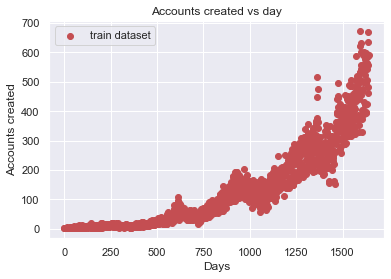

In [135]:
dac_train = df_train.date_account_created.value_counts()
dac_train_date = pd.to_datetime(df_train.date_account_created.value_counts().index)
dac_train_day = dac_train_date - dac_train_date.min()

plt.scatter(dac_train_day.days, dac_train.values, color = 'r', label = 'train dataset')
plt.title("Accounts created vs day")
plt.xlabel("Days")
plt.ylabel("Accounts created")
plt.legend(loc = 'upper left')


On peut voir que Le nombre d'inscriptions d'utilisateurs a fortement augmenté au fil du temps

Les différentes valeurs catégorielles

les different valeur categorielles de gender  :
['-unknown-' 'MALE' 'FEMALE' 'OTHER'] 
 ----------------------- 
 



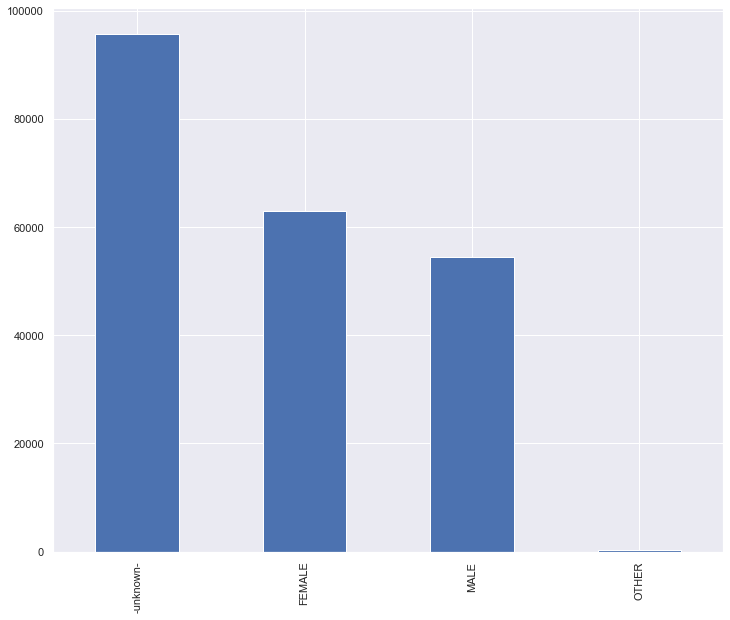

les different valeur categorielles de signup_method  :
['facebook' 'basic' 'google'] 
 ----------------------- 
 



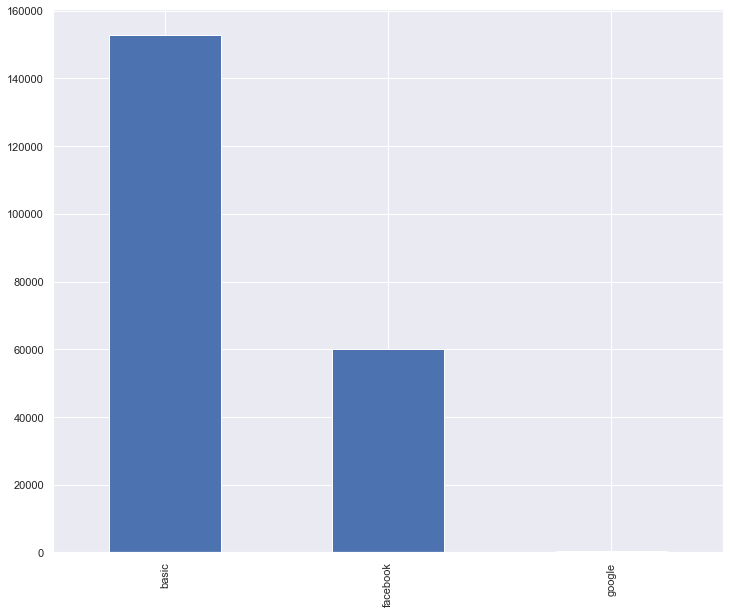

les different valeur categorielles de language  :
['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is'] 
 ----------------------- 
 



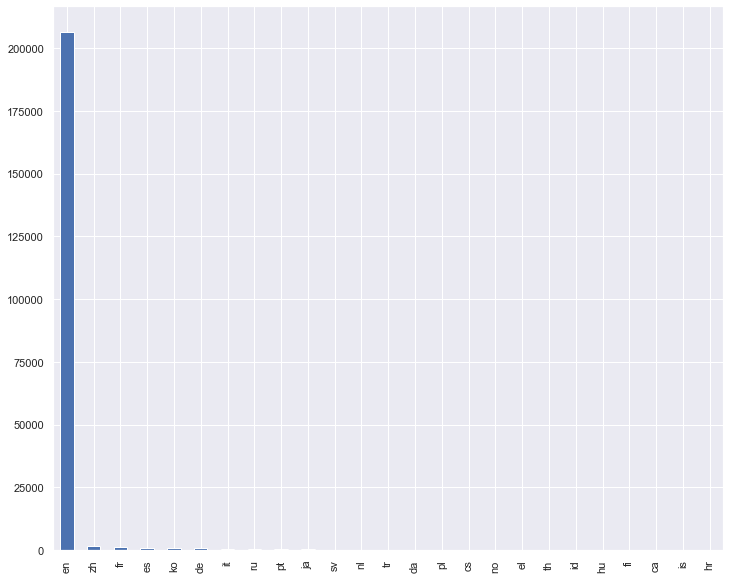

les different valeur categorielles de affiliate_channel  :
['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api'] 
 ----------------------- 
 



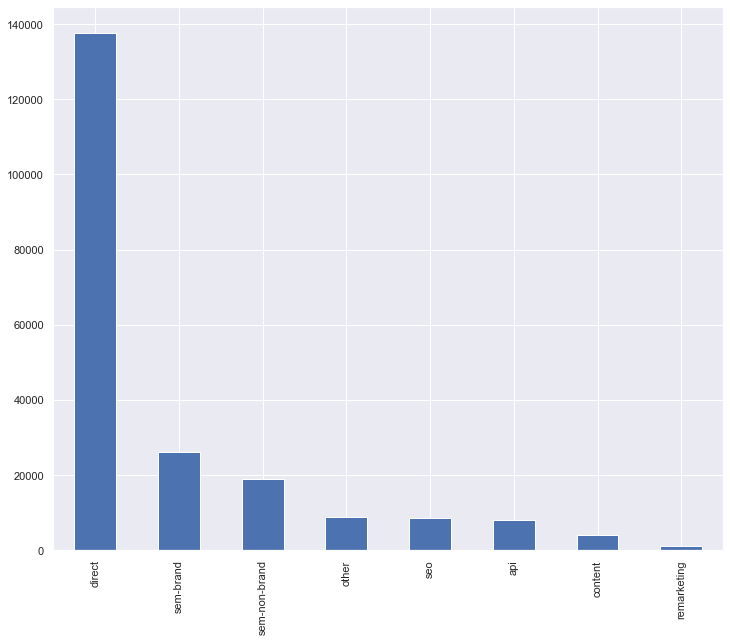

les different valeur categorielles de affiliate_provider  :
['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum'] 
 ----------------------- 
 



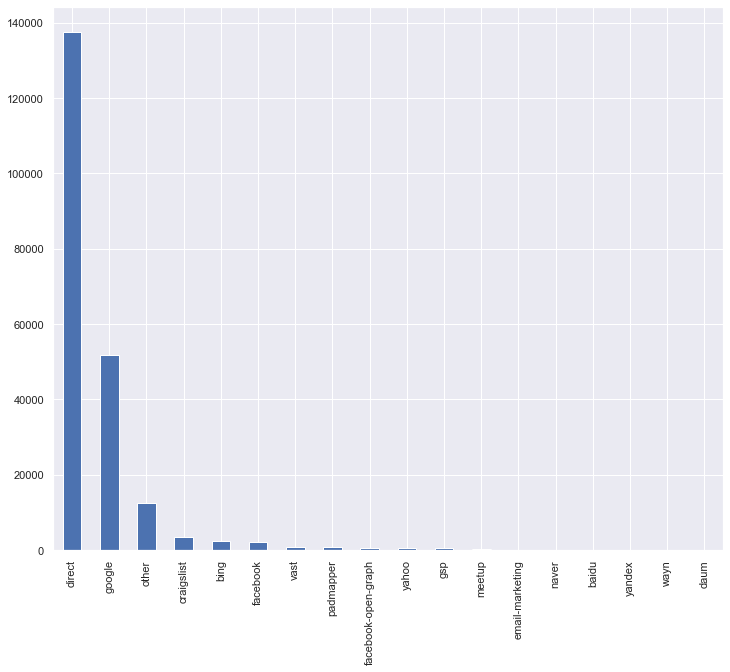

les different valeur categorielles de first_affiliate_tracked  :
['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops'] 
 ----------------------- 
 



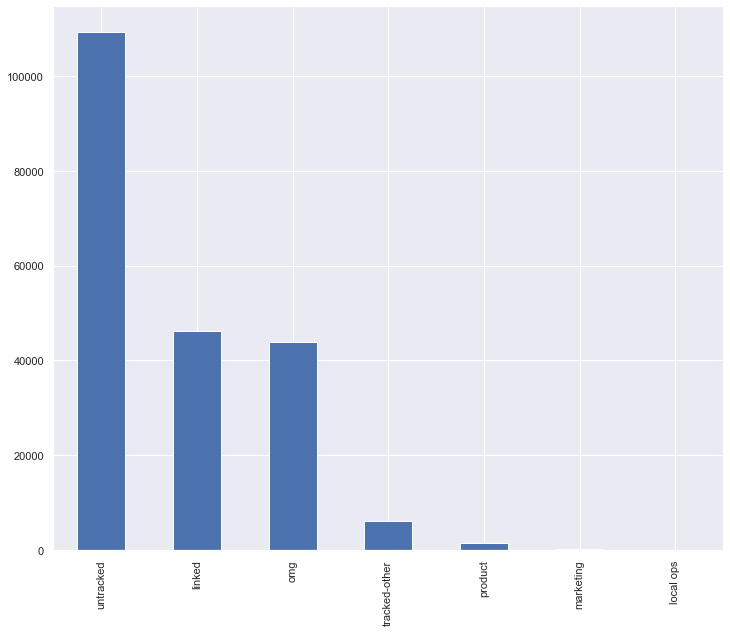

les different valeur categorielles de signup_app  :
['Web' 'Moweb' 'iOS' 'Android'] 
 ----------------------- 
 



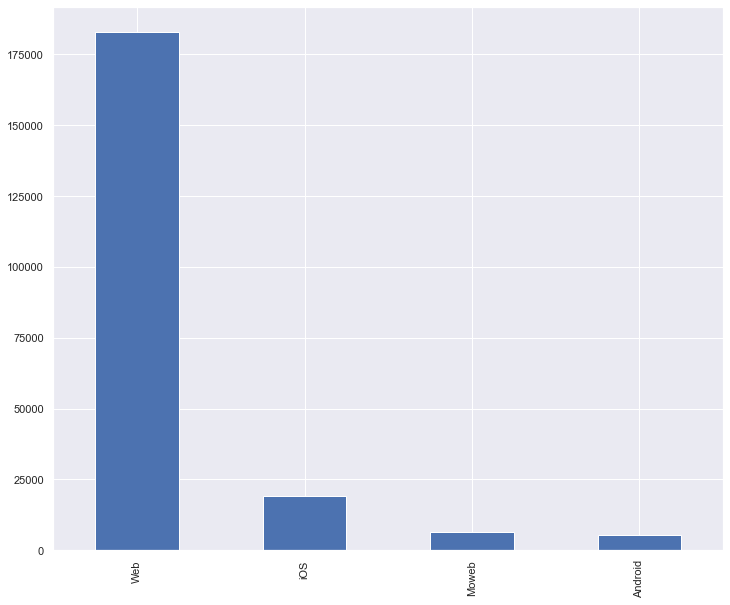

les different valeur categorielles de first_device_type  :
['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)'] 
 ----------------------- 
 



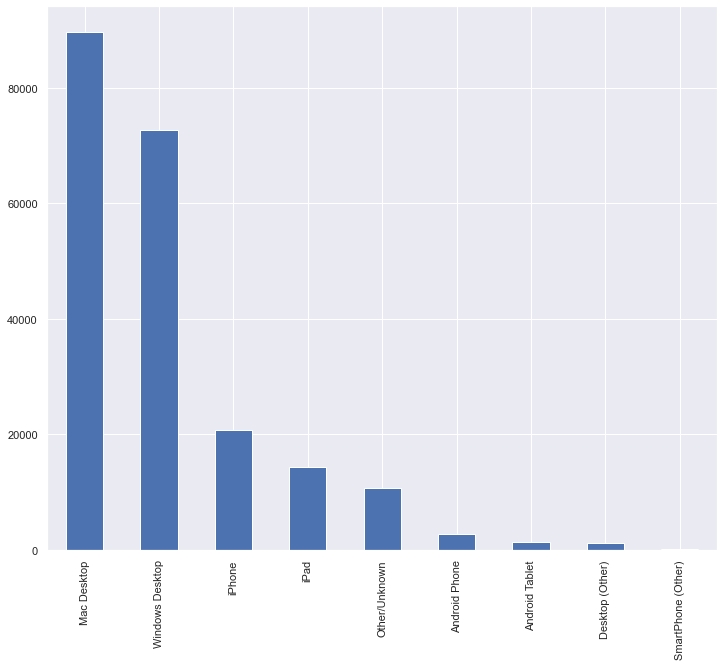

les different valeur categorielles de first_browser  :
['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Palm Pre web browser' 'Mobile Firefox' 'Opera' 'TenFourFox' 'IE Mobile'
 'Apple Mail' 'Silk' 'Camino' 'Arora' 'BlackBerry Browser' 'SeaMonkey'
 'Iron' 'Sogou Explorer' 'IceWeasel' 'Opera Mini' 'SiteKiosk' 'Maxthon'
 'Kindle Browser' 'CoolNovo' 'Conkeror' 'wOSBrowser' 'Google Earth'
 'Crazy Browser' 'Mozilla' 'OmniWeb' 'PS Vita browser' 'NetNewsWire'
 'CometBird' 'Comodo Dragon' 'Flock' 'Pale Moon' 'Avant Browser'
 'Opera Mobile' 'Yandex.Browser' 'TheWorld Browser' 'SlimBrowser' 'Epic'
 'Stainless' 'Googlebot' 'Outlook 2007' 'IceDragon'] 
 ----------------------- 
 



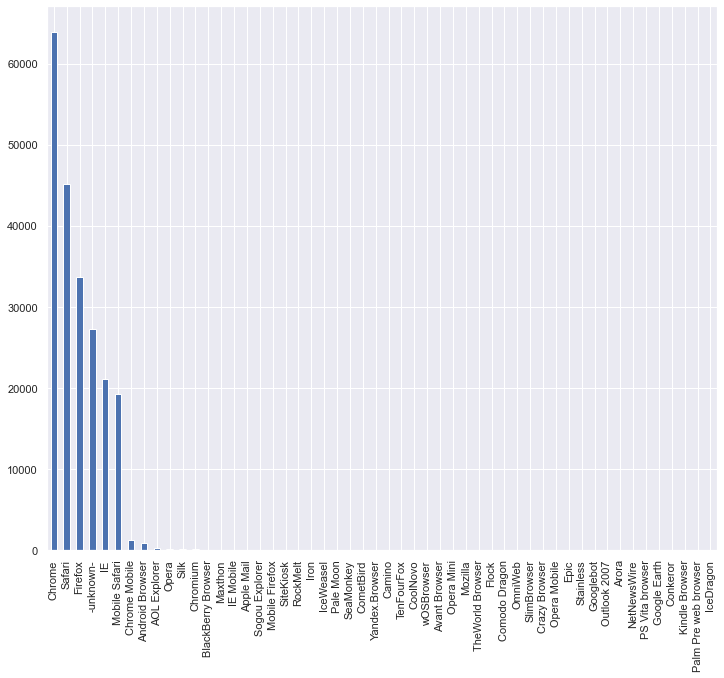

In [136]:
catego = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for x in catego:
    print('les different valeur categorielles de', x, ' :')
    print(df_train[x].unique(), '\n', '-----------------------', '\n', '\n')
    cat = df_train[x].value_counts()
    cat.plot.bar(figsize=(12,10))
    plt.show()

In [137]:
profile = ProfileReport(df_train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [138]:
df_train.isnull().sum()

date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

<br>les colonnes date_first_booking, age, first_affiliate_tracked manquent les données.</br>

In [139]:
df_train.duplicated().sum()

0

Il n'y a pas de doublons lignes.

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

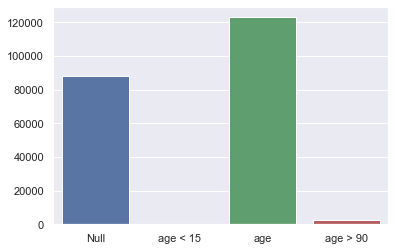

In [140]:
#grouper l'Age, missing values, too small age, reasonable age, too large age
age_train =[df_train[df_train.age.isnull()].age.shape[0],
df_train.query('age < 15').age.shape[0],
df_train.query("age >= 15 & age <= 95").age.shape[0],
df_train.query('age > 95').age.shape[0]]

columns = ['Null', 'age < 15', 'age', 'age > 90']
# plot
sns.barplot(columns, age_train)



In [141]:
age_train

[87990, 57, 122966, 2438]

On peut voir que les principales ages sont entre 15 à 95.

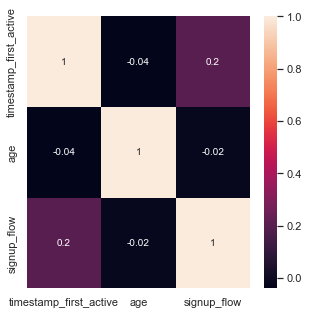

In [142]:
corr=df_train.corr()
corr=corr.round(2)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True)

plt.show()

In [143]:
df_train.describe().round(2)

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.00,213451.00
mean,2.013085e+13,49.67,3.27
std,9.253717e+09,155.67,7.64
min,2.009032e+13,1.00,0.00
25%,2.012123e+13,28.00,0.00
50%,2.013091e+13,34.00,0.00
75%,2.014031e+13,43.00,0.00
max,2.014063e+13,2014.00,25.00


### Étap2 : Prétraiter

#####  Prétraiter le train_users_2.csv

##### Convertir la date

In [144]:
df_train['date_account_created'] = pd.to_datetime(df_train['date_account_created'])
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])
df_train['timestamp_first_active'] = pd.to_datetime(df_train['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [145]:
df_train.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [146]:
df_train.dtypes

date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [147]:
df_train.isnull().sum()/len(df_train)

date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [148]:
### date_first_booking a un pourcentage élevé de Nulls, enlever cette colonne.
df_train.drop('date_first_booking', axis = 1, inplace=True)
df_train.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minute_active', ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

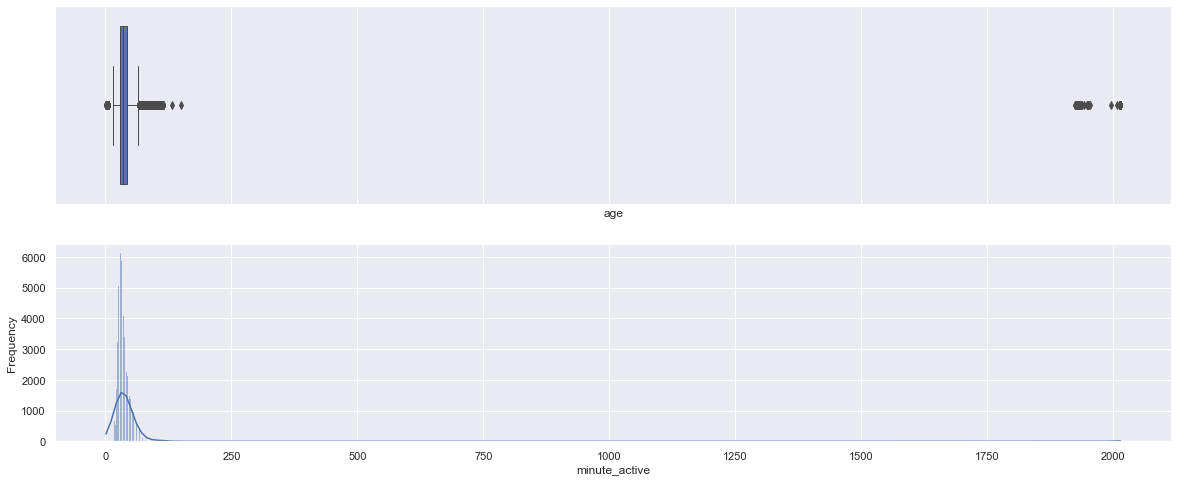

In [149]:
### Pour l'Age 
print(df_train['age'].describe())

plt.figure()
plt.tight_layout()
sns.set(rc={"figure.figsize":(20, 8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
plt.gca().set(xlabel= i,ylabel='Frequency')
sns.boxplot(df_train['age'], ax=ax_box, linewidth= 1.0)
sns.histplot(df_train.age.dropna(), ax=ax_hist ,kde=True)
    

In [150]:
(df_train.age > 95).value_counts()

False    211013
True       2438
Name: age, dtype: int64

In [151]:
(df_train.age < 15).value_counts()

False    213394
True         57
Name: age, dtype: int64

##### Il y a eviron 2500 consomateurs de 95 ans et de moins de 15 ans.

Insérer np.nan pour l'age qui a des valeurs inférieures à 15 et supérieures à 95

In [152]:
df_train.loc[(df_train.age > 95) | (df_train.age < 15), 'age'] = np.nan

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minute_active', ylabel='Frequency'>

<Figure size 1440x576 with 0 Axes>

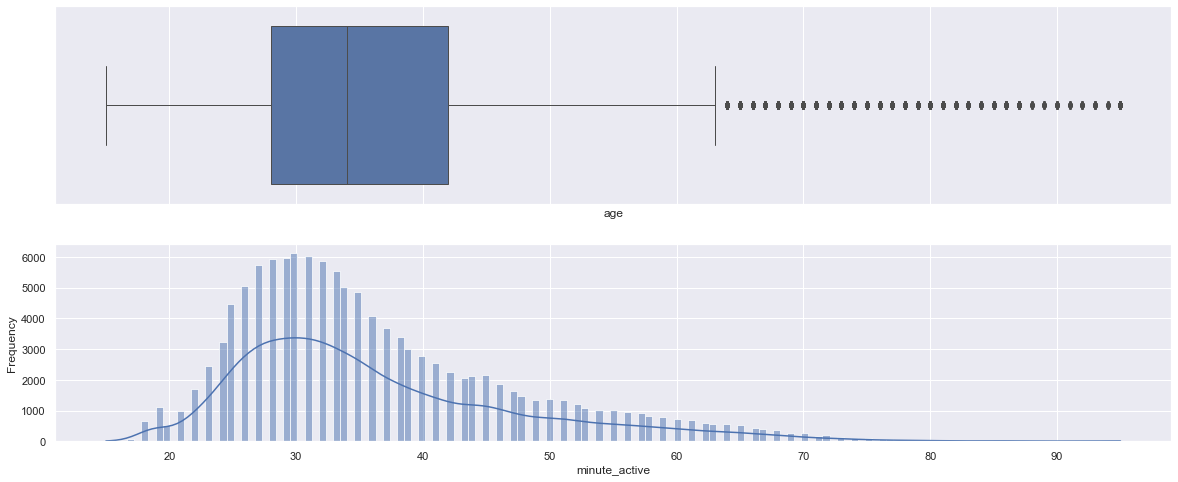

In [153]:
plt.figure()
plt.tight_layout()
sns.set(rc={"figure.figsize":(20, 8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
plt.gca().set(xlabel= i,ylabel='Frequency')
sns.boxplot(df_train['age'], ax=ax_box, linewidth= 1.0)
sns.histplot(df_train.age.dropna(), ax=ax_hist ,kde=True)
    

In [154]:
df_train.age.describe()

count    122966.000000
mean         36.512670
std          11.571761
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

La distribution n'est pas normal.

Utiliser la moyen pour remplacer le np.nan

In [155]:
df_train['age']= df_train['age'].fillna(df_train['age'].mean())

In [156]:
df_train.age.describe()

count    213451.000000
mean         36.512670
std           8.782985
min          15.000000
25%          32.000000
50%          36.512670
75%          36.512670
max          95.000000
Name: age, dtype: float64

In [157]:
bins = [0, 25, 35, 45, 55, 65, 75, 85, 95]
names = ['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
df_train['Ageo'] = pd.cut(df_train['age'], bins, labels=names)
#drop age
df_train.drop("age",axis=1, inplace=True)
#renommer la serie Ageo vers age
df_train = df_train.rename(columns={'Ageo': 'age'})

df_train

,date_account_created,timestamp_first_active,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,36-45
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,36-45
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56-65
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,36-45
87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,36-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,26-35
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,36-45
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,26-35


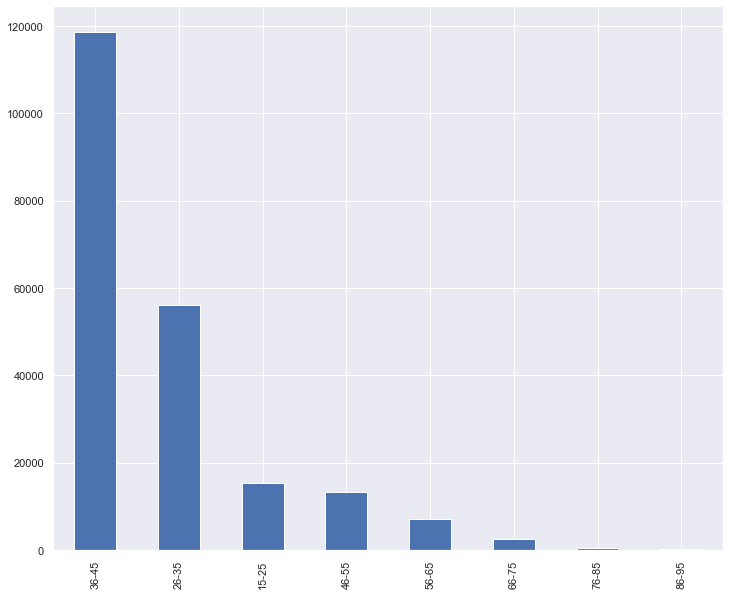

In [158]:
E1 = df_train['age'].value_counts()
E1.plot.bar(figsize=(12,10))
plt.show()

On peut voir que la plupart des personnes âgées de 30 à 45 ans et de 26 à 35.

In [159]:
#Age convertir variable continue. 
#['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']  -->[1, 2, 3, 4, 5, 6, 7, 8]

In [160]:
df_train["Ageo"] = df_train["age"].map(lambda x: 1 if  x== '15-25' else 2 if x== '26-35' else 3 if x== '36-45' else 4 if x== '46-55' 
                                       else 5 if x== '56-65' else 6 if x== '66-75' else 7 if x== '76-85' else 8)

#drop age
df_train.drop("age",axis=1, inplace=True)
#renommer la serie Ageo vers age
df_train = df_train.rename(columns={'Ageo': 'age'})

df_train

,date_account_created,timestamp_first_active,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age
id,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,3
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,3
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,5
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,3
87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,2014-06-30,2014-06-30 23:56:36,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,2
mhewnxesx9,2014-06-30,2014-06-30 23:57:19,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3
6o3arsjbb4,2014-06-30,2014-06-30 23:57:54,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,2


In [161]:
### Pour la date
#obtenir l'année et le mois de 'date_account_created'
df_train['year_create'] = df_train[['date_account_created']].applymap(lambda dt:dt.year if not pd.isnull(dt.year) else None)
df_train['month_create'] = df_train[['date_account_created']].applymap(lambda dt:dt.month if not pd.isnull(dt.month) else None)

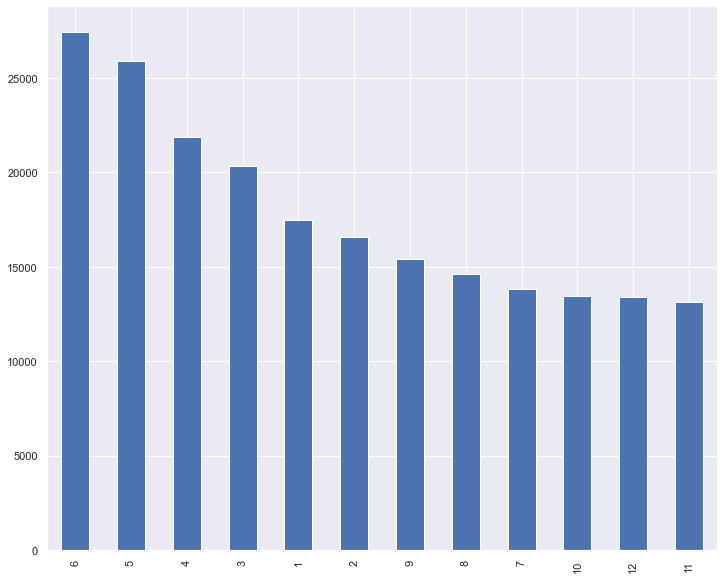

In [162]:
E2 = df_train['month_create'].value_counts()
E2.plot.bar(figsize=(12,10))
plt.show()

On peut voir que la plupart des compte ont été créés en juin, mai et avril.

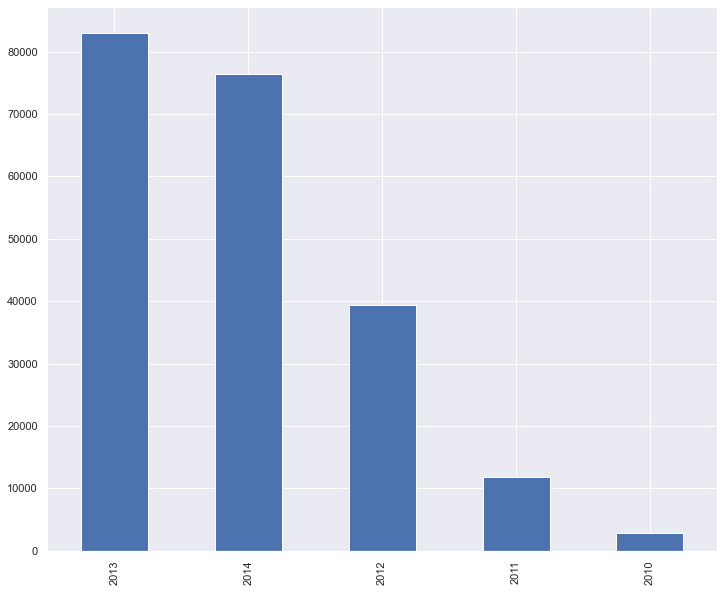

In [163]:
E3 = df_train['year_create'].value_counts()
E3.plot.bar(figsize=(12,10))
plt.show()

On peut voir que la plupart des compte ont été créés à l'année 2013 et 2014.

In [164]:
### Pour la date
#obtenir l'heure de 'timestamp_first_active'
df_train['hour_active'] = df_train[['timestamp_first_active']].applymap(lambda dt:dt.hour if not pd.isnull(dt.hour) else None)
df_train['minute_active'] = df_train[['timestamp_first_active']].applymap(lambda dt:dt.minute if not pd.isnull(dt.minute) else None)

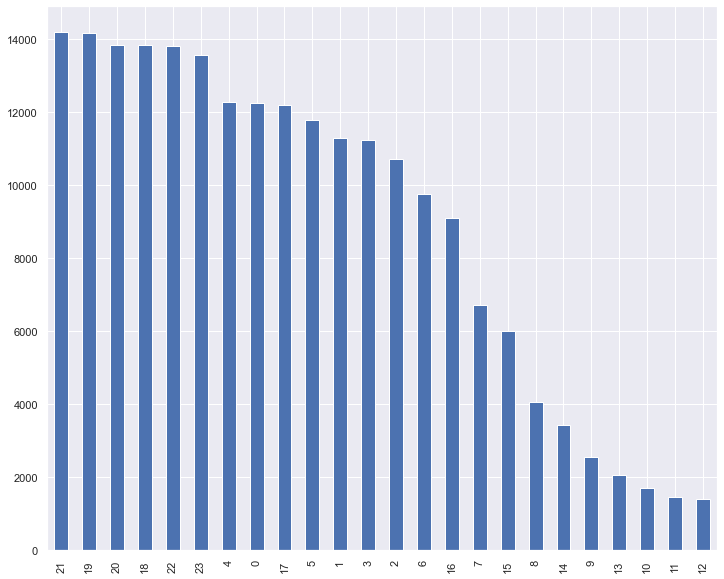

In [165]:
E4 = df_train['hour_active'].value_counts()
E4.plot.bar(figsize=(12,10))
plt.show()

On peut voir que la plupart des utilisateurs visite le site dans la soirée.

In [166]:
df_train.drop(['timestamp_first_active', 'date_account_created'], axis = 1, inplace=True)
df_train

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age,year_create,month_create,hour_active,minute_active
id,,,,,,,,,,,,,,,,
gxn3p5htnn,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,3,2010,6,4,32
820tgsjxq7,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,3,2011,5,17,48
4ft3gnwmtx,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,5,2010,9,23,12
bjjt8pjhuk,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,3,2011,12,6,1
87mebub9p4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,3,2010,9,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,2,2014,6,23,56
mhewnxesx9,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3,2014,6,23,57
6o3arsjbb4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,2,2014,6,23,57


In [167]:
###  Pour first_affiliate_tracked
df_train['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [168]:
df_train['first_affiliate_tracked'].astype('category').value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

le mode de first_affiliate_tracked est 'untracked', on utilise 'untracked' pour remplacer les données manquantes

In [169]:
df_train.loc[:,'first_affiliate_tracked'].fillna('untracked',inplace=True)
df_train

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age,year_create,month_create,hour_active,minute_active
id,,,,,,,,,,,,,,,,
gxn3p5htnn,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,3,2010,6,4,32
820tgsjxq7,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,3,2011,5,17,48
4ft3gnwmtx,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,5,2010,9,23,12
bjjt8pjhuk,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,3,2011,12,6,1
87mebub9p4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,3,2010,9,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,2,2014,6,23,56
mhewnxesx9,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3,2014,6,23,57
6o3arsjbb4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,2,2014,6,23,57


In [170]:
df_train.isnull().sum()/len(df_train)

gender                     0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
age                        0.0
year_create                0.0
month_create               0.0
hour_active                0.0
minute_active              0.0
dtype: float64

Il n'y a pas de valeurs manqantes

In [171]:
# Pour Gender
df_train['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [172]:
df_train['gender'].astype('category').value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

<br>On peut voir il y a beaucoup de "unknown" dans le gender, on remplace '-unknown-' à np.nan.</br>

In [173]:
df_train.gender.replace('-unknown-', np.nan, inplace=True)

In [174]:
df_train['gender'].astype('category').value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

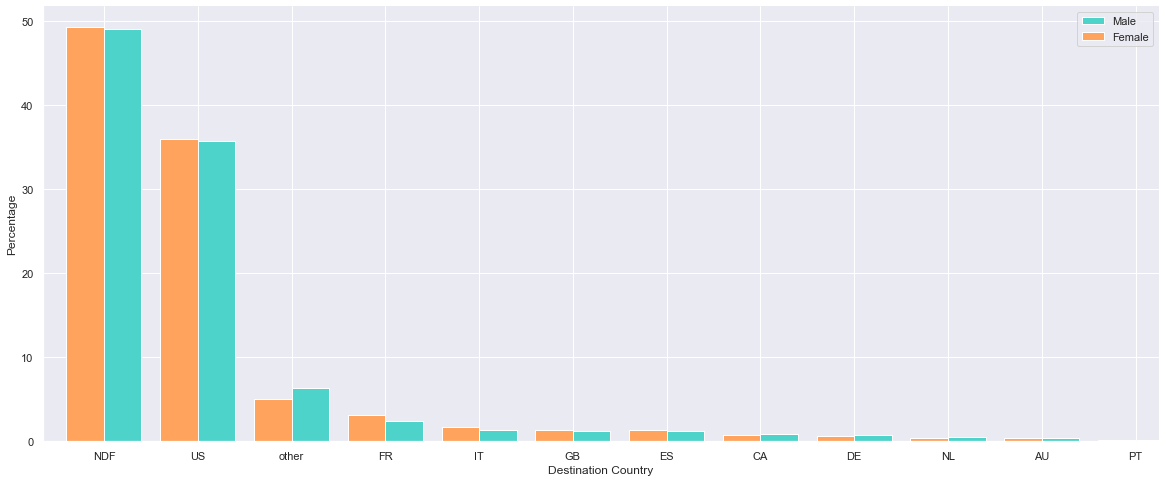

In [175]:
women = sum(df_train['gender'] == 'FEMALE')
men = sum(df_train['gender'] == 'MALE')

female_destinations = df_train.loc[df_train['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = df_train.loc[df_train['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

<br>Il n'y a pas de grandes différences entre les 'FEMALE' et 'MALE', donc ce diagramme n'est pas vraiment utile sauf pour connaître la fréquence de destination relative des pays.</br>

<br>On peut enlever cette colonne </br>


In [176]:
df_train.drop('gender', axis = 1, inplace=True)
df_train

,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age,year_create,month_create,hour_active,minute_active
id,,,,,,,,,,,,,,,
gxn3p5htnn,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,3,2010,6,4,32
820tgsjxq7,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,3,2011,5,17,48
4ft3gnwmtx,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,5,2010,9,23,12
bjjt8pjhuk,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,3,2011,12,6,1
87mebub9p4,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,3,2010,9,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,2,2014,6,23,56
mhewnxesx9,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3,2014,6,23,57
6o3arsjbb4,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,2,2014,6,23,57


In [177]:
#Faire LabelEncoder
#Encodage des données objet en des variables quantitatives
for i in df_train:
    if df_train[i].dtypes == 'object':
        df_train[i] = LabelEncoder().fit_transform(df_train[i])
df_train

,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age,year_create,month_create,hour_active,minute_active
id,,,,,,,,,,,,,,,
gxn3p5htnn,1,0,5,2,4,6,2,3,8,7,3,2010,6,4,32
820tgsjxq7,1,0,5,7,8,6,2,3,8,7,3,2011,5,17,48
4ft3gnwmtx,0,3,5,2,4,6,2,6,21,10,5,2010,9,23,12
bjjt8pjhuk,1,0,5,2,4,6,2,3,17,11,3,2011,12,6,1
87mebub9p4,0,0,5,2,4,6,2,3,8,10,3,2010,9,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxodksqpep,0,0,5,5,8,3,2,3,41,7,2,2014,6,23,56
mhewnxesx9,0,0,5,2,4,0,2,6,8,7,3,2014,6,23,57
6o3arsjbb4,0,0,5,2,4,6,2,3,17,7,2,2014,6,23,57


In [178]:
X=df_train.drop('country_destination', axis = 1)
X.shape

(213451, 14)

In [179]:
scaler = RobustScaler( )
matrix_normorlize=scaler.fit_transform(X)
df_train_RS=pd.DataFrame(matrix_normorlize, columns=X.columns)
df_train_RS

,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age,year_create,month_create,hour_active,minute_active
0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000,-0.428571,0.0,-1.5,0.000000,-0.6875,0.066667
1,1.0,0.0,0.0,1.666667,1.0,0.000000,0.0,-1.000000,-0.428571,0.0,-1.0,-0.166667,0.1250,0.600000
2,0.0,3.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.190476,2.0,-1.5,0.500000,0.5000,-0.600000
3,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000,0.000000,0.0,-1.0,1.000000,-0.5625,-0.966667
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000,-0.428571,0.0,-1.5,0.500000,-0.5625,-0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,0.0,0.0,0.0,1.000000,1.0,-1.000000,0.0,-1.000000,1.142857,-1.0,0.5,0.000000,0.5000,0.866667
213447,0.0,0.0,0.0,0.000000,0.0,-2.000000,0.0,0.000000,-0.428571,0.0,0.5,0.000000,0.5000,0.900000
213448,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-1.000000,0.000000,-1.0,0.5,0.000000,0.5000,0.900000
213449,0.0,25.0,0.0,0.333333,2.0,-0.333333,1.0,0.666667,0.571429,0.0,0.5,0.000000,0.5000,0.933333


In [180]:
#sauvegarder le train dataset 
df_train_RS.to_csv("Airbnb_train_sortie.csv", index=False)

##### Prétraiter le test_users.csv

In [181]:
df_test = pd.read_csv('test_users.csv')
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [182]:
print(df_test.shape)
df_test.dtypes

(62096, 15)


id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking         float64
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
dtype: object

<br>Il y a 15 descripteurs, ce sont id, date_account_created, timestamp_first_active, date_first_booking, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser. </br> 

<br>Il y a 62096 enrgistrements dans le dataset</br>

In [183]:
df_test.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

<br>les colonnes date_first_booking, age, first_affiliate_tracked manquent les données.</br>
<br>la colonne date_first_booking est toute vide.</br>

In [184]:
df_test.duplicated().sum()

0

Il n'y a pas de doublons lignes.

les different valeur categorielles de gender  :
['FEMALE' '-unknown-' 'MALE' 'OTHER'] 
 ----------------------- 
 



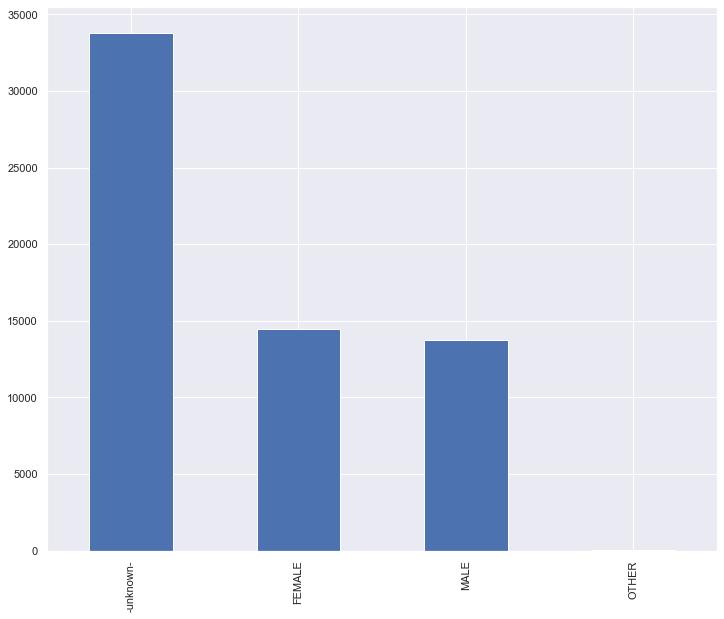

les different valeur categorielles de signup_method  :
['facebook' 'basic' 'google' 'weibo'] 
 ----------------------- 
 



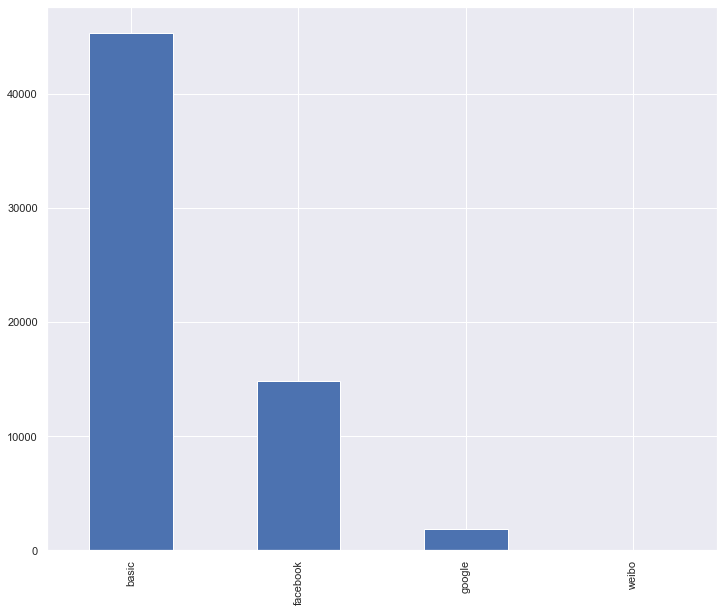

les different valeur categorielles de language  :
['en' 'de' 'zh' 'fr' 'ko' 'sv' 'no' 'it' 'es' 'nl' 'ja' 'ru' 'pt' 'tr'
 'cs' 'el' 'hu' 'pl' 'da' 'fi' 'th' 'ca' '-unknown-' 'id'] 
 ----------------------- 
 



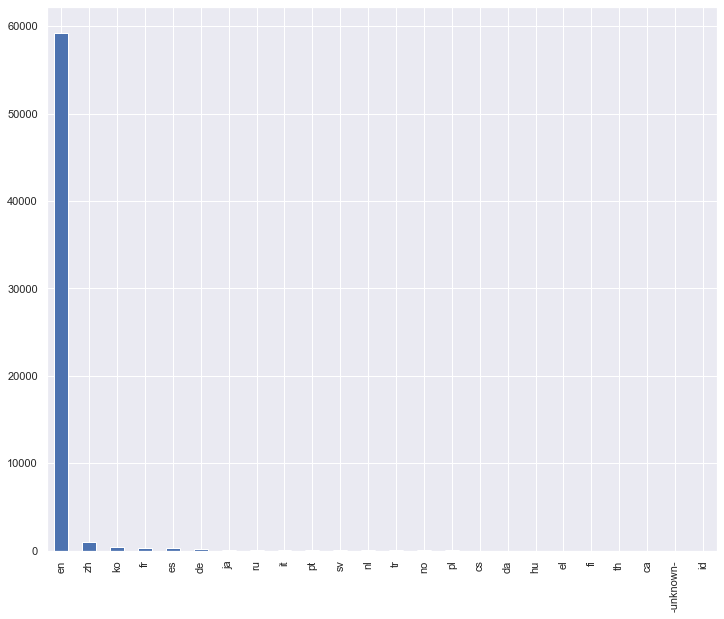

les different valeur categorielles de affiliate_channel  :
['direct' 'sem-brand' 'sem-non-brand' 'seo' 'remarketing' 'other'
 'content'] 
 ----------------------- 
 



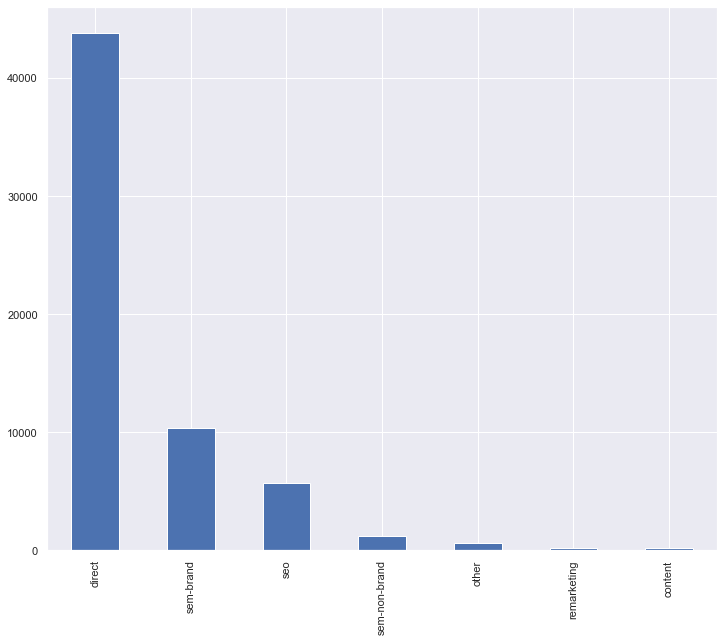

les different valeur categorielles de affiliate_provider  :
['direct' 'google' 'bing' 'facebook' 'other' 'craigslist' 'padmapper'
 'email-marketing' 'yahoo' 'baidu' 'naver' 'gsp' 'facebook-open-graph'
 'meetup' 'vast' 'daum' 'yandex'] 
 ----------------------- 
 



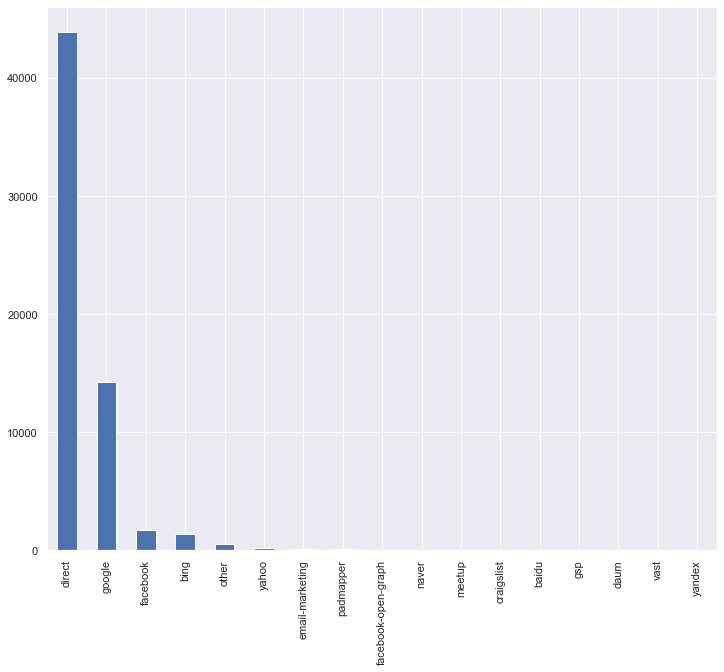

les different valeur categorielles de first_affiliate_tracked  :
['untracked' 'linked' 'omg' 'product' 'marketing' 'tracked-other' nan
 'local ops'] 
 ----------------------- 
 



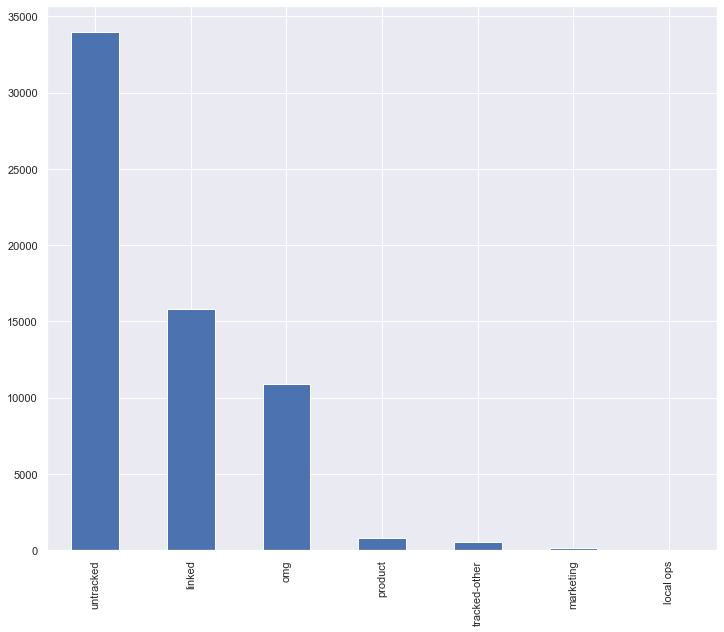

les different valeur categorielles de signup_app  :
['Moweb' 'Web' 'iOS' 'Android'] 
 ----------------------- 
 



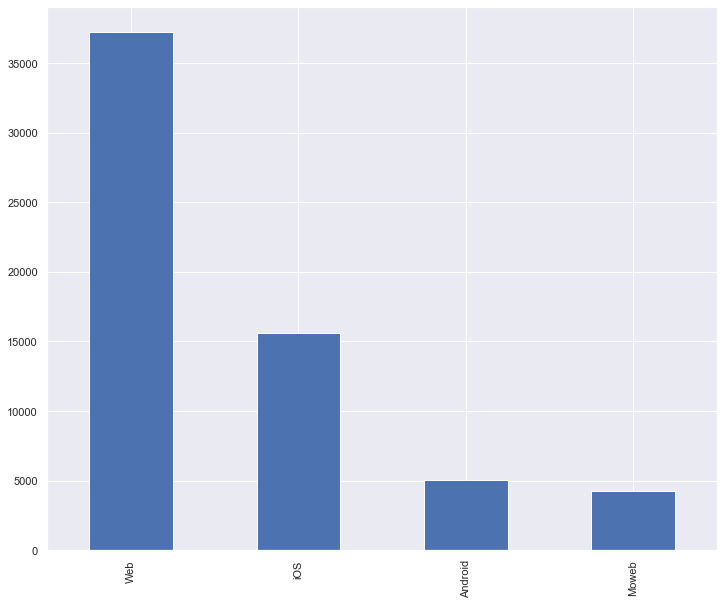

les different valeur categorielles de first_device_type  :
['iPhone' 'Windows Desktop' 'Mac Desktop' 'iPad' 'Android Tablet'
 'Android Phone' 'Desktop (Other)' 'Other/Unknown' 'SmartPhone (Other)'] 
 ----------------------- 
 



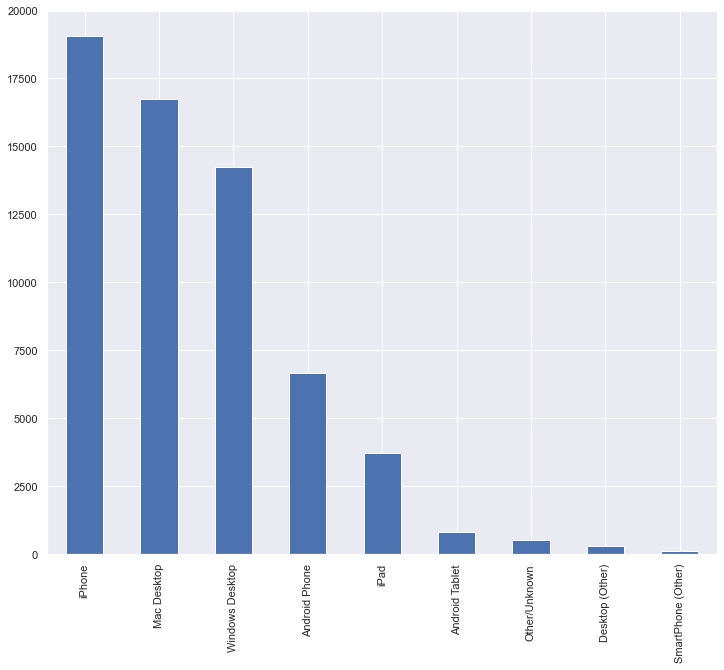

les different valeur categorielles de first_browser  :
['Mobile Safari' 'Chrome' 'IE' 'Safari' '-unknown-' 'Firefox'
 'Chrome Mobile' 'Android Browser' 'IE Mobile' 'BlackBerry Browser'
 'Opera' 'Silk' 'Mobile Firefox' 'AOL Explorer' 'SeaMonkey' 'Opera Mobile'
 'wOSBrowser' 'Chromium' 'Apple Mail' 'Maxthon' 'IBrowse' 'Sogou Explorer'
 'Iron' 'Yandex.Browser' 'SiteKiosk' 'Pale Moon' 'Nintendo Browser'
 'Opera Mini' 'CometBird' 'IceWeasel' 'UC Browser'] 
 ----------------------- 
 



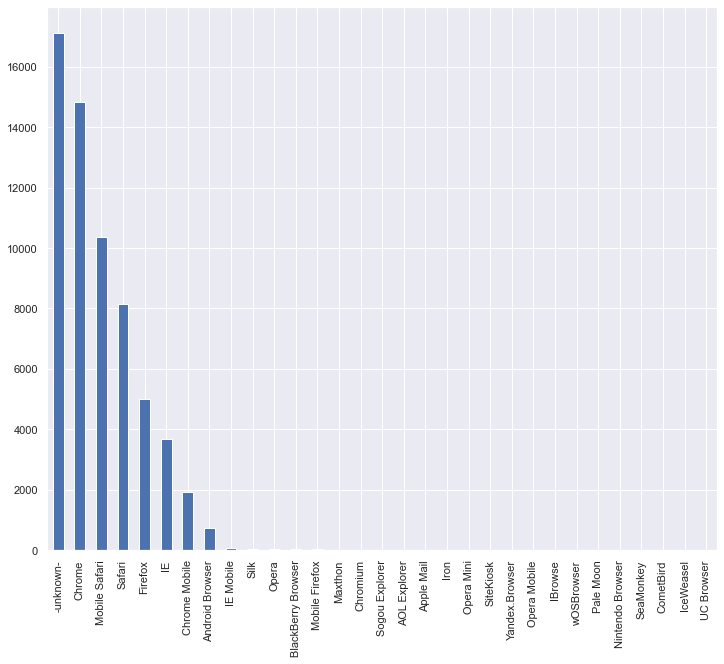

In [185]:
catego = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for x in catego:
    print('les different valeur categorielles de', x, ' :')
    print(df_test[x].unique(), '\n', '-----------------------', '\n', '\n')
    cat = df_test[x].value_counts()
    cat.plot.bar(figsize=(12,10))
    plt.show()

In [186]:
#Drop la colonne date_first_booking 
df_test.drop('date_first_booking', axis = 1, inplace=True)


In [187]:
#Convertir la date
df_test['date_account_created'] = pd.to_datetime(df_test['date_account_created'])
df_test['timestamp_first_active'] = pd.to_datetime(df_test['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [188]:
df_test.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
dtype: object

In [189]:
df_test.isnull().sum()/len(df_train)

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
gender                     0.000000
age                        0.135282
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.000094
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
dtype: float64

count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64


E:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


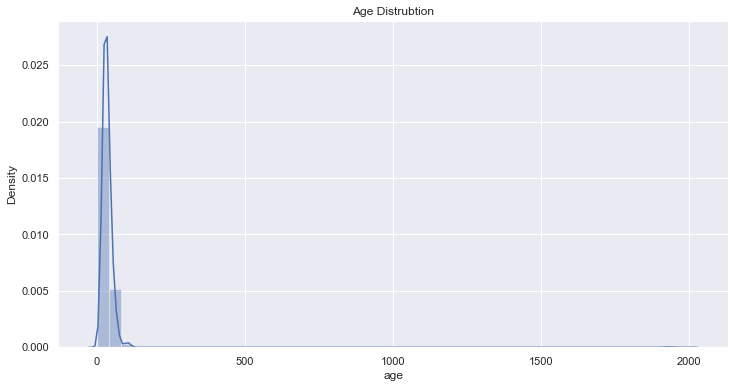

In [190]:
### Pour l'Age 
print(df_test['age'].describe())

plt.figure(figsize=(12,6))
sns.distplot(df_test.age.dropna())
plt.title('Age Distrubtion')
plt.show()


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

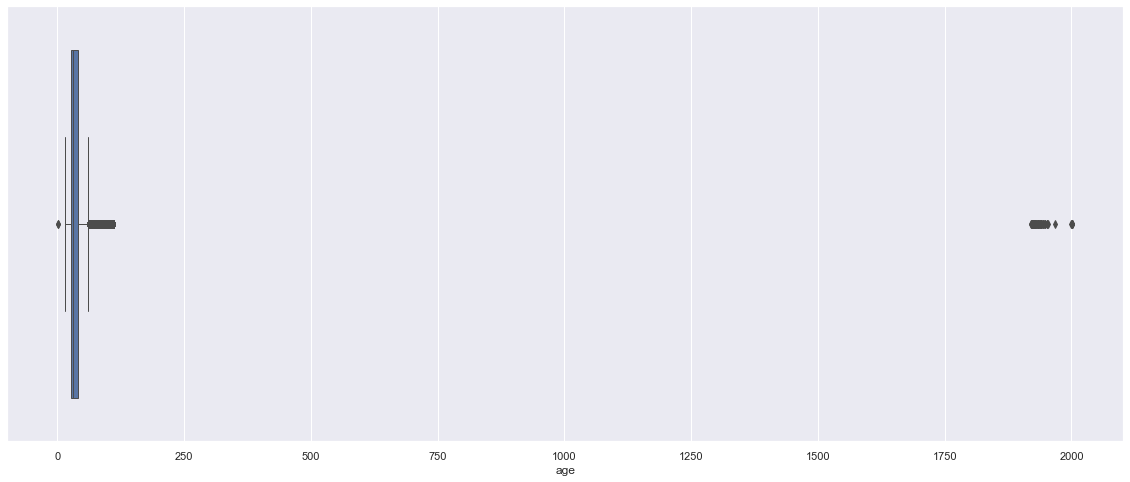

In [191]:
plt.figure()
plt.tight_layout()
sns.set(rc={"figure.figsize":(20, 8)})
sns.boxplot(df_test['age'], linewidth= 1.0)


Insérer np.nan pour l'age qui a des valeurs inférieures à 15 et supérieures à 95

In [192]:
df_test.loc[(df_test.age > 95) | (df_test.age < 15), 'age'] = np.nan

Utiliser la moyen pour remplacer le np.nan

In [193]:
df_test['age']= df_test['age'].fillna(df_test['age'].mean())

In [194]:
df_test.age.describe()

count    62096.000000
mean        34.140357
std          8.213000
min         15.000000
25%         31.000000
50%         34.140357
75%         34.140357
max         95.000000
Name: age, dtype: float64

In [195]:
bins = [0, 25, 35, 45, 55, 65, 75, 85, 95]
names = ['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
df_test['Ageo'] = pd.cut(df_test['age'], bins, labels=names)
#drop age
df_test.drop("age",axis=1, inplace=True)
#renommer la serie Ageo vers age
df_test = df_test.rename(columns={'Ageo': 'age'})

df_test

,id,date_account_created,timestamp_first_active,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,FEMALE,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,26-35
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,-unknown-,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,26-35
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,26-35
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,26-35
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,-unknown-,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,26-35
62092,zp8xfonng8,2014-09-30,2014-09-30 23:53:06,-unknown-,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,26-35
62093,fa6260ziny,2014-09-30,2014-09-30 23:54:08,-unknown-,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,26-35
62094,87k0fy4ugm,2014-09-30,2014-09-30 23:54:30,-unknown-,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,26-35


#Age convertir variable continue. 
#['15-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']  -->[1, 2, 3, 4, 5, 6, 7, 8]

In [196]:
df_test["Ageo"] = df_test["age"].map(lambda x: 1 if  x== '15-25' else 2 if x== '26-35' else 3 if x== '36-45' else 4 if x== '46-55' 
                                       else 5 if x== '56-65' else 6 if x== '66-75' else 7 if x== '76-85' else 8)

#drop age
df_test.drop("age",axis=1, inplace=True)
#renommer la serie Ageo vers age
df_test = df_test.rename(columns={'Ageo': 'age'})

df_test

,id,date_account_created,timestamp_first_active,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,FEMALE,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,-unknown-,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,2
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,-unknown-,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2
62092,zp8xfonng8,2014-09-30,2014-09-30 23:53:06,-unknown-,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2
62093,fa6260ziny,2014-09-30,2014-09-30 23:54:08,-unknown-,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2
62094,87k0fy4ugm,2014-09-30,2014-09-30 23:54:30,-unknown-,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2


In [197]:
### Pour la date
#obtenir l'année et le mois de 'date_account_created'
df_test['year_create'] = df_test[['date_account_created']].applymap(lambda dt:dt.year if not pd.isnull(dt.year) else None)
df_test['month_create'] = df_test[['date_account_created']].applymap(lambda dt:dt.month if not pd.isnull(dt.month) else None)

In [198]:
### Pour la date
#obtenir l'heure de 'timestamp_first_active'
df_test['hour_active'] = df_test[['timestamp_first_active']].applymap(lambda dt:dt.hour if not pd.isnull(dt.hour) else None)
df_test['minute_active'] = df_test[['timestamp_first_active']].applymap(lambda dt:dt.minute if not pd.isnull(dt.minute) else None)

In [199]:
df_test.drop(['timestamp_first_active', 'date_account_created'], axis = 1, inplace=True)


In [200]:
###  Pour first_affiliate_tracked
df_test['first_affiliate_tracked'].unique()

array(['untracked', 'linked', 'omg', 'product', 'marketing',
       'tracked-other', nan, 'local ops'], dtype=object)

In [201]:
df_test['first_affiliate_tracked'].astype('category').value_counts()

untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
Name: first_affiliate_tracked, dtype: int64

le mode de first_affiliate_tracked est 'untracked', on utilise 'untracked' pour remplacer les données manquantes

In [202]:
df_test.loc[:,'first_affiliate_tracked'].fillna('untracked',inplace=True)
df_test

,id,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age,year_create,month_create,hour_active,minute_active
0,5uwns89zht,FEMALE,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2,2014,7,0,0
1,jtl0dijy2j,-unknown-,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2,2014,7,0,0
2,xx0ulgorjt,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2,2014,7,0,1
3,6c6puo6ix0,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,2,2014,7,0,2
4,czqhjk3yfe,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2,2014,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,-unknown-,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2,2014,9,23,52
62092,zp8xfonng8,-unknown-,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2,2014,9,23,53
62093,fa6260ziny,-unknown-,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2,2014,9,23,54
62094,87k0fy4ugm,-unknown-,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2,2014,9,23,54


In [203]:
df_test.isnull().sum()/len(df_test)

id                         0.0
gender                     0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
age                        0.0
year_create                0.0
month_create               0.0
hour_active                0.0
minute_active              0.0
dtype: float64

Il n'y a pas de valeurs manqantes

In [204]:
# Pour Gender
df_test['gender'].unique()

array(['FEMALE', '-unknown-', 'MALE', 'OTHER'], dtype=object)

In [205]:
#Drop Gender comme dans le train.csv
df_test.drop('gender', axis = 1, inplace=True)
df_test

,id,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age,year_create,month_create,hour_active,minute_active
0,5uwns89zht,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2,2014,7,0,0
1,jtl0dijy2j,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2,2014,7,0,0
2,xx0ulgorjt,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2,2014,7,0,1
3,6c6puo6ix0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,2,2014,7,0,2
4,czqhjk3yfe,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2,2014,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2,2014,9,23,52
62092,zp8xfonng8,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2,2014,9,23,53
62093,fa6260ziny,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2,2014,9,23,54
62094,87k0fy4ugm,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2,2014,9,23,54


In [206]:
# Mettre id comme index
df_test = df_test.set_index(['id'])

In [207]:
#Faire LabelEncoder
#Encodage des données objet en des variables quantitatives
for i in df_test:
    if df_test[i].dtypes == 'object':
        df_test[i] = LabelEncoder().fit_transform(df_test[i])
df_test

,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age,year_create,month_create,hour_active,minute_active
id,,,,,,,,,,,,,,
5uwns89zht,1,0,6,1,4,6,1,8,17,2,2014,7,0,0
jtl0dijy2j,0,0,6,1,4,6,1,8,17,2,2014,7,0,0
xx0ulgorjt,0,0,6,1,4,0,2,6,5,2,2014,7,0,1
6c6puo6ix0,0,0,6,1,4,0,2,6,11,2,2014,7,0,2
czqhjk3yfe,0,0,6,1,4,6,2,3,23,2,2014,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cv0na2lf5a,0,0,6,1,4,6,2,6,11,2,2014,9,23,52
zp8xfonng8,0,23,14,1,4,6,0,0,0,2,2014,9,23,53
fa6260ziny,0,0,4,1,4,0,2,6,9,2,2014,9,23,54


In [208]:
df_test.shape

(62096, 14)

In [209]:

matrix_test=scaler.fit_transform(df_test)
df_test_RS=pd.DataFrame(matrix_test, columns=df_test.columns)
df_test_RS

,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age,year_create,month_create,hour_active,minute_active
0,1.0,0.0,0.0,0.000000,0.0,0.000000,-1.0,0.4,0.705882,0.0,0.0,-0.5,-1.000000,-1.000000
1,0.0,0.0,0.0,0.000000,0.0,0.000000,-1.0,0.4,0.705882,0.0,0.0,-0.5,-1.000000,-1.000000
2,0.0,0.0,0.0,0.000000,0.0,-1.000000,0.0,0.0,0.000000,0.0,0.0,-0.5,-1.000000,-0.966667
3,0.0,0.0,0.0,0.000000,0.0,-1.000000,0.0,0.0,0.352941,0.0,0.0,-0.5,-1.000000,-0.933333
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.6,1.058824,0.0,0.0,-0.5,-1.000000,-0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.352941,0.0,0.0,0.5,0.533333,0.733333
62092,0.0,1.0,8.0,0.000000,0.0,0.000000,-2.0,-1.2,-0.294118,0.0,0.0,0.5,0.533333,0.766667
62093,0.0,0.0,-2.0,0.000000,0.0,-1.000000,0.0,0.0,0.235294,0.0,0.0,0.5,0.533333,0.800000
62094,0.0,0.0,0.0,1.000000,2.0,-0.500000,0.0,-0.6,1.058824,0.0,0.0,0.5,0.533333,0.800000


In [210]:
#sauvegarder le test dataset 
df_test_RS.to_csv("Airbnb_test_sortie.csv", index=False)